## Import dependencies

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Get image as numpy array

In [185]:
def get_image(path):
    """
    Get image from path
    :param path: path to image  (str: C:/Users/.../image.jpg)
    :return: image as numpy array
    """
    img = Image.open(path)
    img = np.array(img)
    return img.astype(np.uint8)

## Image show

In [11]:
# image show
def show_image(img, cmap=None, figsize=(5, 5)):
    """
    :param img: image
    :param cmap: color map 
    :param figsize: figure size
    :return: None
    """
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

## numpy RGB image to gray image

In [201]:
# numpy rgb image to gray image
def rgb2gray(img):
    """
    :param img: image as numpy array
    :return: gray image as numpy array
    gray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    """
    gray = 0.2989 * img[:, :, 0] + 0.5870 * img[:, :, 1] + 0.1140 * img[:, :, 2]

    ## take mean of all channels
    # gray = img.mean(axis=-1)
    return gray.astype(np.uint8)

## Add padding in numpy array image

In [186]:
# add padding to image
def add_padding(img, padding_size, color=0):
    """
    :param img: numpy array
    :param padding_size: int
    :param color: int
        :size 1: gray image 0-255
        :size 3: RGB image (0, 0, 0) - (255, 255, 255)
    :return: numpy array
    """
    # Gray image
    if len(img.shape) == 2:
        img_height, img_width = img.shape
        padded_img = np.full((img_height + padding_size * 2, img_width + padding_size * 2), color, dtype=img.dtype)
        padded_img[padding_size:-padding_size, padding_size:-padding_size] = img
    # RGB image
    elif len(img.shape) == 3:
        img_height, img_width, img_channel = img.shape
        padded_img = np.full((img_height + padding_size * 2, img_width + padding_size * 2, img_channel), color, dtype=img.dtype)
        padded_img[padding_size:-padding_size, padding_size:-padding_size] = img
    return padded_img.astype(np.uint8)

## Get angle between 3 points

In [171]:
# get angle between 3 points
def get_angle(p1, p2, p3):
    """
    :param p1: numpy array
    :param p2: numpy array
    :param p3: numpy array
    :return: float
    """
    v1 = p1 - p2
    v2 = p3 - p2
    angle = np.math.atan2(np.linalg.det([v1, v2]), np.dot(v1, v2))
    return np.degrees(angle)

def get_three_point_angle(p1, p_c, p2):
        """
        :param p1: numpy array (start point)
        :param p_c: numpy array (center point)
        :param p2: numpy array (end point)
        :return: float
        """
        a = np.linalg.norm(p2 - p1)
        b = np.linalg.norm(p_c - p2)
        c = np.linalg.norm(p_c - p1)
        angle = np.arccos((b**2 + c**2 - a**2) / (2 * b * c))
        # if p_c[1] < p2[1]:
        #     angle = 2 * np.pi - angle
        return angle * 180 / np.pi

## Draw digonal line on the image 

In [158]:
def get_diagonal_points(img):
    """
    :param img: numpy array
    :return: numpy array
    """
    diagonal_points = []
    if img.shape[0] == img.shape[1]:
        for i in range(img.shape[0]):
            diagonal_points.append((i, i))
    else:
        p1 = np.array([0, 0])
        p2 = np.array([img.shape[0]-1, img.shape[1]-1])
        p3 = np.array([img.shape[0]-1, 0])
        angle = get_angle(p1, p2, p3)
        for i in range(img.shape[0]):
            j = int(i * np.tan(angle))
            if j < img.shape[1]:
                diagonal_points.append((i, j))
    return np.array(diagonal_points)

In [170]:
# draw diagonal line
def draw_diagonal_line(img, digonal_thikness=20, color=0):
    """
    :param img: numpy array
    :param digonal_thikness: int
    :param color: int
        :size 1: gray image 0-255
        :size 3: RGB image (0, 0, 0) - (255, 255, 255)
    :return: numpy array
    """
    temp_img = img.copy()
    diagonal_points = get_diagonal_points(temp_img)
    height, width = temp_img.shape[:2]
    for point in diagonal_points:
        for i in range(digonal_thikness//2):
            if point[0] + i < height:
                temp_img[point[0] + i, point[1]] = color
                temp_img[point[0] + i, -point[1]] = color
            if point[0] - i >= 0:
                temp_img[point[0] - i, point[1]] = color
                temp_img[point[0] - i, -point[1]] = color

    
    return temp_img

## Diagonal lines values mean set on image center points

In [175]:
## Diagonal lines values mean set on image center point
def set_diagonal_mean_on_center(img, center_redius=20):
    """
    :param img: numpy array
    :return: numpy array
    """
    temp_img = img.copy()
    diagonal_points = get_diagonal_points(temp_img)
    height, width = temp_img.shape[:2]
    center_point = (height//2, width//2)
    mean_value = 0
    for point in diagonal_points:
        mean_value += temp_img[point[0], point[1]]
    mean_value = mean_value // len(diagonal_points)
    for i in range(center_redius):
        for j in range(center_redius):
            temp_img[center_point[0] + i, center_point[1] + j] = mean_value
            temp_img[center_point[0] - i, center_point[1] + j] = mean_value
            temp_img[center_point[0] + i, center_point[1] - j] = mean_value
            temp_img[center_point[0] - i, center_point[1] - j] = mean_value
    return temp_img.astype(np.uint8)


## Image color histogram

In [207]:
# Image histogram
def get_histogram(img):
    """
    :param img: numpy array
    :return: numpy array
    """
    histogram = np.zeros(256)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            histogram[img[i, j]] += 1
    return histogram

## Plot histogram

In [229]:
# plot histogram
def plot_histogram(img, title="Histogram", color="b"):
    """
    :param img: numpy array
    :param title: str
    :param color: str
    :return: None
    """
    if len(img.shape) == 2:
        histogram = get_histogram(img)
        plt.figure(figsize=(10, 5))
        plt.bar(np.arange(256), histogram, color=color)
        plt.title(title)
        plt.show()
    else:
        colors = ["r", "g", "b"]

        plt.figure(figsize=(12, 5))
        for i in range(3):
            histogram = get_histogram(img[:, :, i])
            plt.subplot(1, 3, i+1)
            plt.bar(np.arange(256), histogram, color=colors[i])
            plt.title(title + " " + colors[i])
        plt.show()

## Read image from file

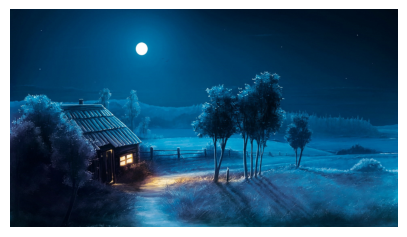

In [187]:
img = get_image('data/01.jpg')
show_image(img)

## show rgb image with padding

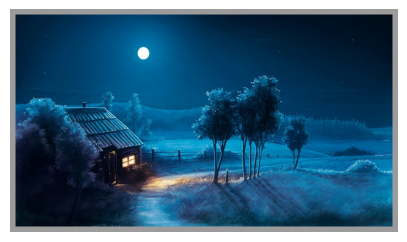

In [188]:
pad_rgb_img = add_padding(img, 20, color=(155, 155, 155))
show_image(pad_rgb_img)

## RBG image show with diagonal lines

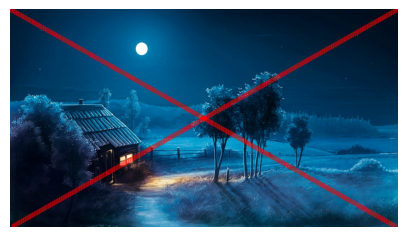

In [189]:
# rbg image show with diagonal line
rgb_diagonal_img = draw_diagonal_line(img, color=(255, 0, 0))
show_image(rgb_diagonal_img)

## replace rgb image center point with diagonal points mean

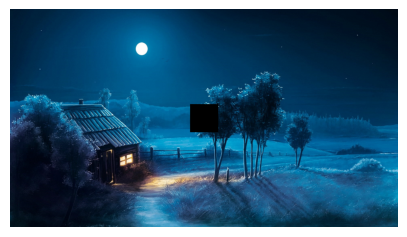

In [190]:
rgb_center_diagonal_img = set_diagonal_mean_on_center(img, center_redius=50)
show_image(rgb_center_diagonal_img)

## RGB image plot histogram

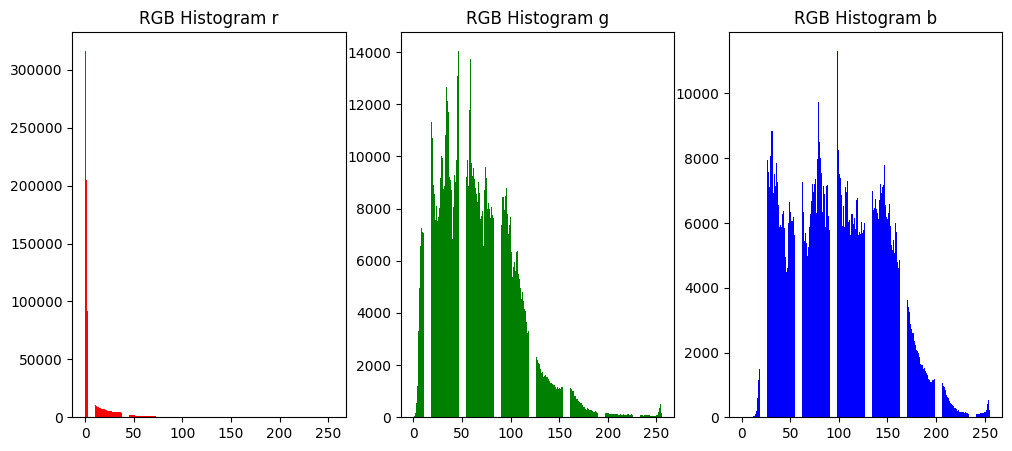

In [230]:
plot_histogram(img, title="RGB Histogram")

## get gray scale image

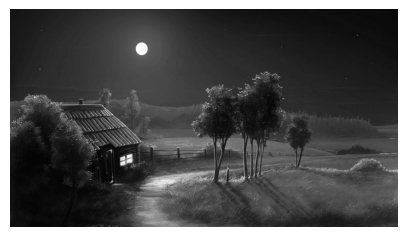

In [202]:
gray_img = rgb2gray(img)
show_image(gray_img, cmap='gray')

## gray scale image with padding

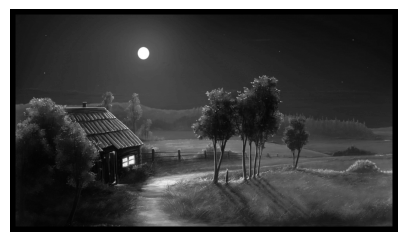

In [203]:
pad_img = add_padding(gray_img, 20)
show_image(pad_img, cmap='gray')

## gray scale image show with diagonal lines

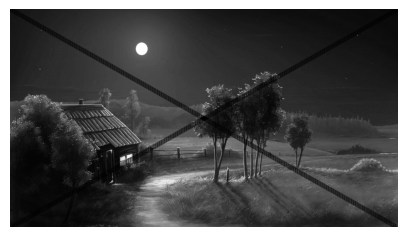

In [204]:
# rbg image show with diagonal line
gray_diagonal_img = draw_diagonal_line(gray_img, color=0)
show_image(gray_diagonal_img, cmap='gray')

## Plot gray scale image where center point replace by diagonal points mean value

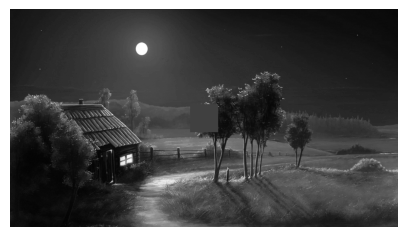

In [205]:
gray_center_diagonal_img = set_diagonal_mean_on_center(gray_img, center_redius=50)
show_image(gray_center_diagonal_img, cmap='gray')

## plot gray sacale image histogram

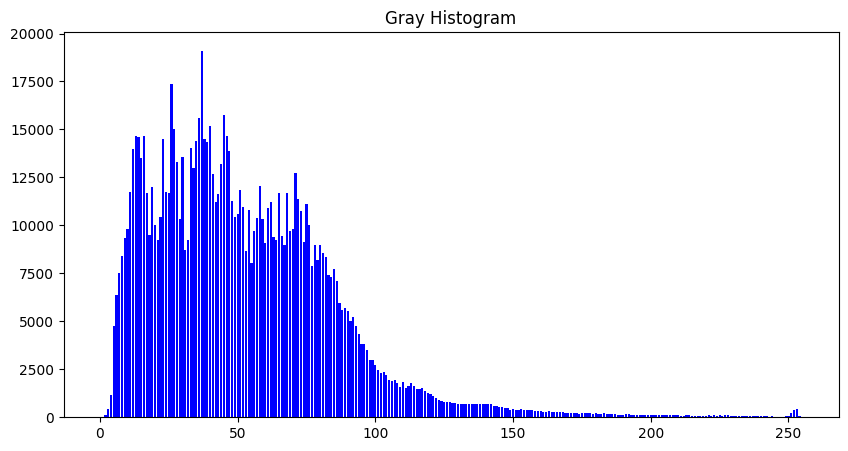

In [231]:
plot_histogram(gray_img, title="Gray Histogram")